<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_0_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.8_n250.csv',
 'data_add_delta_-0.8_n120.csv',
 'data_add_delta_-0.8_n60.csv',
 'data_add_delta_-0.8_n30.csv',
 'data_add_delta_-0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.343152,67.239203,52.219708,49.195635,0.247582,255.245281,255.066198,0.179083
1,0.0,1.0,81.182496,74.405001,46.411210,34.228997,-0.072469,246.155234,246.334042,-0.178808
2,0.0,2.0,49.594786,27.488478,37.613578,45.210679,0.194867,170.102389,170.014484,0.087905
3,0.0,3.0,29.315649,87.650492,48.890702,82.275322,0.114385,258.246550,258.204861,0.041690
4,0.0,4.0,44.101619,83.447730,94.481201,94.723903,0.118760,326.873213,326.761448,0.111765
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,60.270111,53.828495,49.846464,46.518196,-0.011548,220.451718,220.439890,0.011827
19996,999.0,16.0,85.520642,78.655468,80.749400,31.862710,0.224646,287.012865,286.719721,0.293144
19997,999.0,17.0,77.019542,37.397570,52.559881,86.232353,0.209602,263.418949,263.189094,0.229855
19998,999.0,18.0,79.357514,40.317173,25.329722,48.958802,-0.311590,203.651622,203.897882,-0.246260


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.343152,67.239203,52.219708,49.195635,0.247582,255.245281,255.066198,0.179083
1,0.0,1.0,81.182496,74.405001,46.411210,34.228997,-0.072469,246.155234,246.334042,-0.178808
2,0.0,2.0,49.594786,27.488478,37.613578,45.210679,0.194867,170.102389,170.014484,0.087905
3,0.0,3.0,29.315649,87.650492,48.890702,82.275322,0.114385,258.246550,258.204861,0.041690
4,0.0,4.0,44.101619,83.447730,94.481201,94.723903,0.118760,326.873213,326.761448,0.111765
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,60.270111,53.828495,49.846464,46.518196,-0.011548,220.451718,220.439890,0.011827
19996,999.0,16.0,85.520642,78.655468,80.749400,31.862710,0.224646,287.012865,286.719721,0.293144
19997,999.0,17.0,77.019542,37.397570,52.559881,86.232353,0.209602,263.418949,263.189094,0.229855
19998,999.0,18.0,79.357514,40.317173,25.329722,48.958802,-0.311590,203.651622,203.897882,-0.246260


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.343152  67.239203  52.219708  49.195635  0.247582  255.245281   
      1.0    81.182496  74.405001  46.411210  34.228997 -0.072469  246.155234   
      2.0    49.594786  27.488478  37.613578  45.210679  0.194867  170.102389   
      3.0    29.315649  87.650492  48.890702  82.275322  0.114385  258.246550   
      4.0    44.101619  83.447730  94.481201  94.723903  0.118760  326.873213   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   60.270111  53.828495  49.846464  46.518196 -0.011548  220.451718   
      16.0   85.520642  78.655468  80.749400  31.862710  0.224646  287.012865   
      17.0   77.019542  37.397570  52.559881  86.232353  0.209602  263.418949   
      18.0   79.357514  40.317173  25.329722  48.958802 -0.311590  203.651622   
      19.0   64.663704  43.568727  57.485634  27.564403 -0.106171  203.176296   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    255.066198  0.179083  
      1.0    246.334042 -0.178808  
      2.0    170.014484  0.087905  
      3.0    258.204861  0.041690  
      4.0    326.761448  0.111765  
...                 ...       ...  
999.0 15.0   220.439890  0.011827  
      16.0   286.719721  0.293144  
      17.0   263.189094  0.229855  
      18.0   203.897882 -0.246260  
      19.0   203.210419 -0.034123  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.343152  67.239203  52.219708  49.195635  0.247582  255.245281   
      1.0    81.182496  74.405001  46.411210  34.228997 -0.072469  246.155234   
      2.0    49.594786  27.488478  37.613578  45.210679  0.194867  170.102389   
      3.0    29.315649  87.650492  48.890702  82.275322  0.114385  258.246550   
      4.0    44.101619  83.447730  94.481201  94.723903  0.118760  326.873213   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   60.270111  53.828495  49.846464  46.518196 -0.011548  220.451718   
      16.0   85.520642  78.655468  80.749400  31.862710  0.224646  287.012865   
      17.0   77.019542  37.397570  52.559881  86.232353  0.209602  263.418949   
      18.0   79.357514  40.317173  25.329722  48.958802 -0.311590  203.651622   
      19.0   64.663704  43.568727  57.485634  27.564403 -0.106171  203.176296   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    255.066198  0.179083  
      1.0    246.334042 -0.178808  
      2.0    170.014484  0.087905  
      3.0    258.204861  0.041690  
      4.0    326.761448  0.111765  
...                 ...       ...  
999.0 15.0   220.439890  0.011827  
      16.0   286.719721  0.293144  
      17.0   263.189094  0.229855  
      18.0   203.897882 -0.246260  
      19.0   203.210419 -0.034123  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.343152,67.239203,52.219708,49.195635,0.247582,255.245281,255.066198,0.179083
1,0.0,1.0,81.182496,74.405001,46.411210,34.228997,-0.072469,246.155234,246.334042,-0.178808
2,0.0,2.0,49.594786,27.488478,37.613578,45.210679,0.194867,170.102389,170.014484,0.087905
3,0.0,3.0,29.315649,87.650492,48.890702,82.275322,0.114385,258.246550,258.204861,0.041690
4,0.0,4.0,44.101619,83.447730,94.481201,94.723903,0.118760,326.873213,326.761448,0.111765
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,60.270111,53.828495,49.846464,46.518196,-0.011548,220.451718,220.439890,0.011827
19996,999.0,16.0,85.520642,78.655468,80.749400,31.862710,0.224646,287.012865,286.719721,0.293144
19997,999.0,17.0,77.019542,37.397570,52.559881,86.232353,0.209602,263.418949,263.189094,0.229855
19998,999.0,18.0,79.357514,40.317173,25.329722,48.958802,-0.311590,203.651622,203.897882,-0.246260


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.343152  67.239203  52.219708  49.195635  0.247582  255.245281   
      1.0    81.182496  74.405001  46.411210  34.228997 -0.072469  246.155234   
      2.0    49.594786  27.488478  37.613578  45.210679  0.194867  170.102389   
      3.0    29.315649  87.650492  48.890702  82.275322  0.114385  258.246550   
      4.0    44.101619  83.447730  94.481201  94.723903  0.118760  326.873213   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   60.270111  53.828495  49.846464  46.518196 -0.011548  220.451718   
      16.0   85.520642  78.655468  80.749400  31.862710  0.224646  287.012865   
      17.0   77.019542  37.397570  52.559881  86.232353  0.209602  263.418949   
      18.0   79.357514  40.317173  25.329722  48.958802 -0.311590  203.651622   
      19.0   64.663704  43.568727  57.485634  27.564403 -0.106171  203.176296   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    255.066198  0.179083  
      1.0    246.334042 -0.178808  
      2.0    170.014484  0.087905  
      3.0    258.204861  0.041690  
      4.0    326.761448  0.111765  
...                 ...       ...  
999.0 15.0   220.439890  0.011827  
      16.0   286.719721  0.293144  
      17.0   263.189094  0.229855  
      18.0   203.897882 -0.246260  
      19.0   203.210419 -0.034123  

[20000 rows x 8 columns]

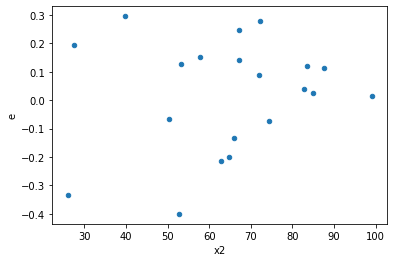

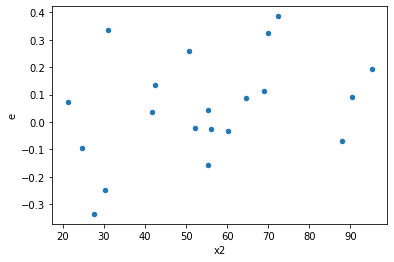

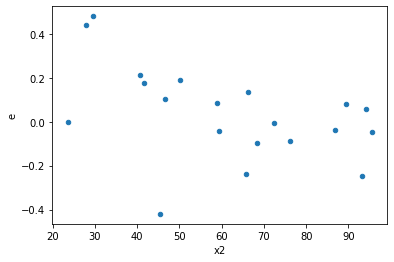

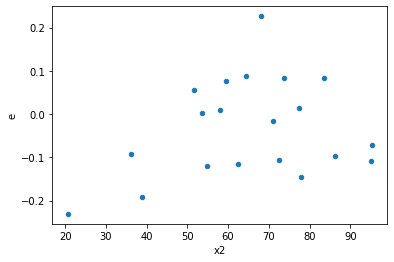

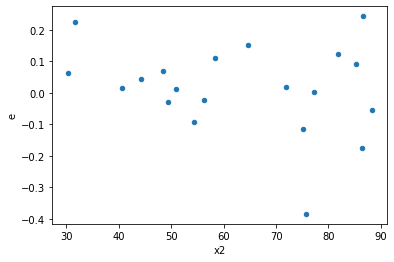

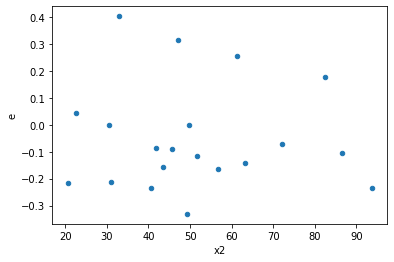

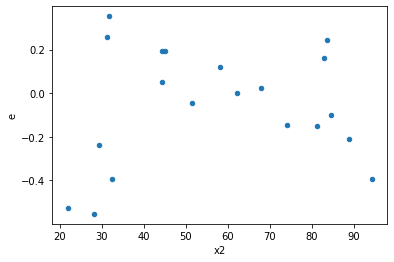

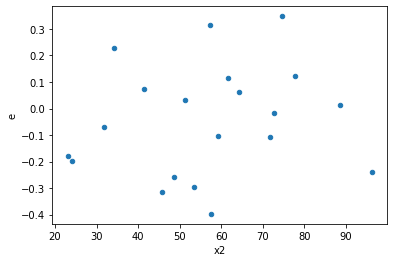

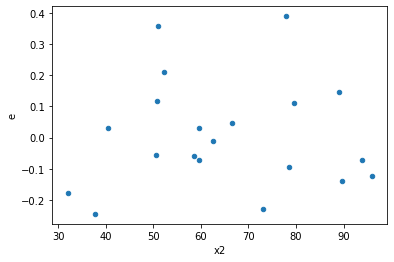

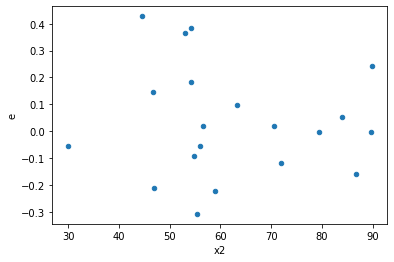

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,4.0,0.12311015013047445,0.18881440219282725,0.030777537532618613,0.04720360054820681,1.5337029643186868,0.68871083118953,0.655644584405235,0.344355415594765,Reject005=1 : Homoscedasticity
2.0,4.0,4.0,0.02045191145198044,0.07394138646594929,0.00511297786299511,0.018485346616487323,3.6153777919270844,0.24098213387483303,0.8795089330625835,0.12049106693741651,Reject005=1 : Homoscedasticity
3.0,4.0,4.0,0.004346122699655784,0.013958102853879061,0.001086530674913946,0.0034895257134697653,3.211621902663851,0.2847173147952633,0.8576413426023684,0.14235865739763165,Reject005=1 : Homoscedasticity
5.0,4.0,4.0,0.031068891188467906,0.10459011565231095,0.007767222797116976,0.026147528913077738,3.3663935741334896,0.2666565653695372,0.8666717173152314,0.1333282826847686,Reject005=1 : Homoscedasticity
8.0,4.0,4.0,0.05738717485419394,0.0590214446956593,0.014346793713548484,0.014755361173914825,1.028477962987682,0.9789427645662436,0.5105286177168782,0.4894713822831218,Reject005=1 : Homoscedasticity
11.0,4.0,4.0,0.006699256668869945,0.02369669315916127,0.0016748141672174863,0.005924173289790317,3.5372123103261415,0.2486314933341216,0.8756842533329392,0.1243157466670608,Reject005=1 : Homoscedasticity
13.0,4.0,4.0,0.07923612572022963,0.20486830061678574,0.019809031430057408,0.051217075154196434,2.5855416169657723,0.37992899324470675,0.8100355033776466,0.18996449662235337,Reject005=1 : Homoscedasticity
15.0,4.0,4.0,0.1759344349992728,0.19212326963993812,0.0439836087498182,0.04803081740998453,1.0920162936876583,0.9340657948441331,0.5329671025779334,0.46703289742206655,Reject005=1 : Homoscedasticity
17.0,4.0,4.0,0.04495973781499982,0.23984994505548737,0.011239934453749954,0.05996248626387184,5.334771880619526,0.13378154673617182,0.9331092266319141,0.06689077336808591,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,0.12311015013047445,0.18881440219282725,0.030777537532618613,0.04720360054820681,1.5337029643186868,0.68871083118953,Reject005=1 : Homoscedasticity
1.0,4.0,4.0,0.06367944142608965,0.007483970880572897,0.015919860356522413,0.0018709927201432243,0.1175256992362168,0.06170682025865942,Reject005=1 : Homoscedasticity
2.0,4.0,4.0,0.02045191145198044,0.07394138646594929,0.00511297786299511,0.018485346616487323,3.6153777919270844,0.24098213387483303,Reject005=1 : Homoscedasticity
3.0,4.0,4.0,0.004346122699655784,0.013958102853879061,0.001086530674913946,0.0034895257134697653,3.211621902663851,0.2847173147952633,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,0.08041908448241102,0.03551688905530941,0.020104771120602754,0.008879222263827353,0.441647517923156,0.44809562866991354,Reject005=1 : Homoscedasticity
5.0,4.0,4.0,0.031068891188467906,0.10459011565231095,0.007767222797116976,0.026147528913077738,3.3663935741334896,0.2666565653695372,Reject005=1 : Homoscedasticity
6.0,4.0,4.0,0.3627919602884519,0.04129172652197761,0.09069799007211297,0.010322931630494402,0.11381654237637187,0.05838385966827617,Reject005=1 : Homoscedasticity
7.0,4.0,4.0,0.09815275768556249,0.030693842348773696,0.024538189421390622,0.007673460587193424,0.31271502780495514,0.2864179333502977,Reject005=1 : Homoscedasticity
8.0,4.0,4.0,0.05738717485419394,0.0590214446956593,0.014346793713548484,0.014755361173914825,1.028477962987682,0.9789427645662436,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      896
Reject005=0 : Heteroscedasticity    104
Name: Result_test, dtype: int64